### Binary Regression with KNN Regression

Dataset obtained from UCI Machine Learning repository: https://archive.ics.uci.edu/ml/machine-learning-databases/00360/

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [74]:
airq = pd.read_csv('AirQualityUCI/AirQualityUCI.csv', sep = ';', index_col=0)

In [75]:
airq.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
Date,,,,,,,,,,,,,,,,
10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


##### Simple Data Exploration

In [91]:
airq.isna().sum().max()

9471

In [93]:
airq = airq[['PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)','CO(GT)']]

Only 1 % nulls so we will drop these instances

In [94]:
print(f"Percentage of Nulls: {(airq.isna().sum().max()/X_train.shape[0])*100} %")

Percentage of Nulls: 1.6237003275886626 %


In [95]:
airq = airq.dropna()

In [103]:
airq.shape

(9357, 4)

In [104]:
X = airq[['PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)']]
y = airq[['CO(GT)']]

In [106]:
X.shape
y.shape

(9357, 1)

In [107]:
X = X.rename(columns = {'PT08.S1(CO)':'CO', 'NMHC(GT)':'GT', 'PT08.S2(NMHC)':'NMHC'})

In [109]:
y.shape

(9357, 1)

In [98]:
##Transform Time column from string to integer -- do in future -- for now dropping it

In [99]:
X.head()

,CO,GT,NMHC
Date,,,
10/03/2004,1360.0,150.0,1046.0
10/03/2004,1292.0,112.0,955.0
10/03/2004,1402.0,88.0,939.0
10/03/2004,1376.0,80.0,948.0
10/03/2004,1272.0,51.0,836.0


class sklearn.neighbors.KNeighborsRegressor(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=None, **kwargs)[source]¶

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 10)

In [116]:
regressor = KNeighborsClassifier(n_neighbors = 7)

In [119]:
regressor.fit(X_train, np.array(y_train).ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [138]:
prediction = regressor.predict(X_test)

In [124]:
print('R2 for the model: ')
regressor.score(X_test, y_test)

R2 for the model: 


0.14145299145299145

In [130]:
type(X_train)

pandas.core.frame.DataFrame

In [155]:
type(y_test)

pandas.core.frame.DataFrame

In [ ]:
## Complete Figure

<IPython.core.display.Javascript object>


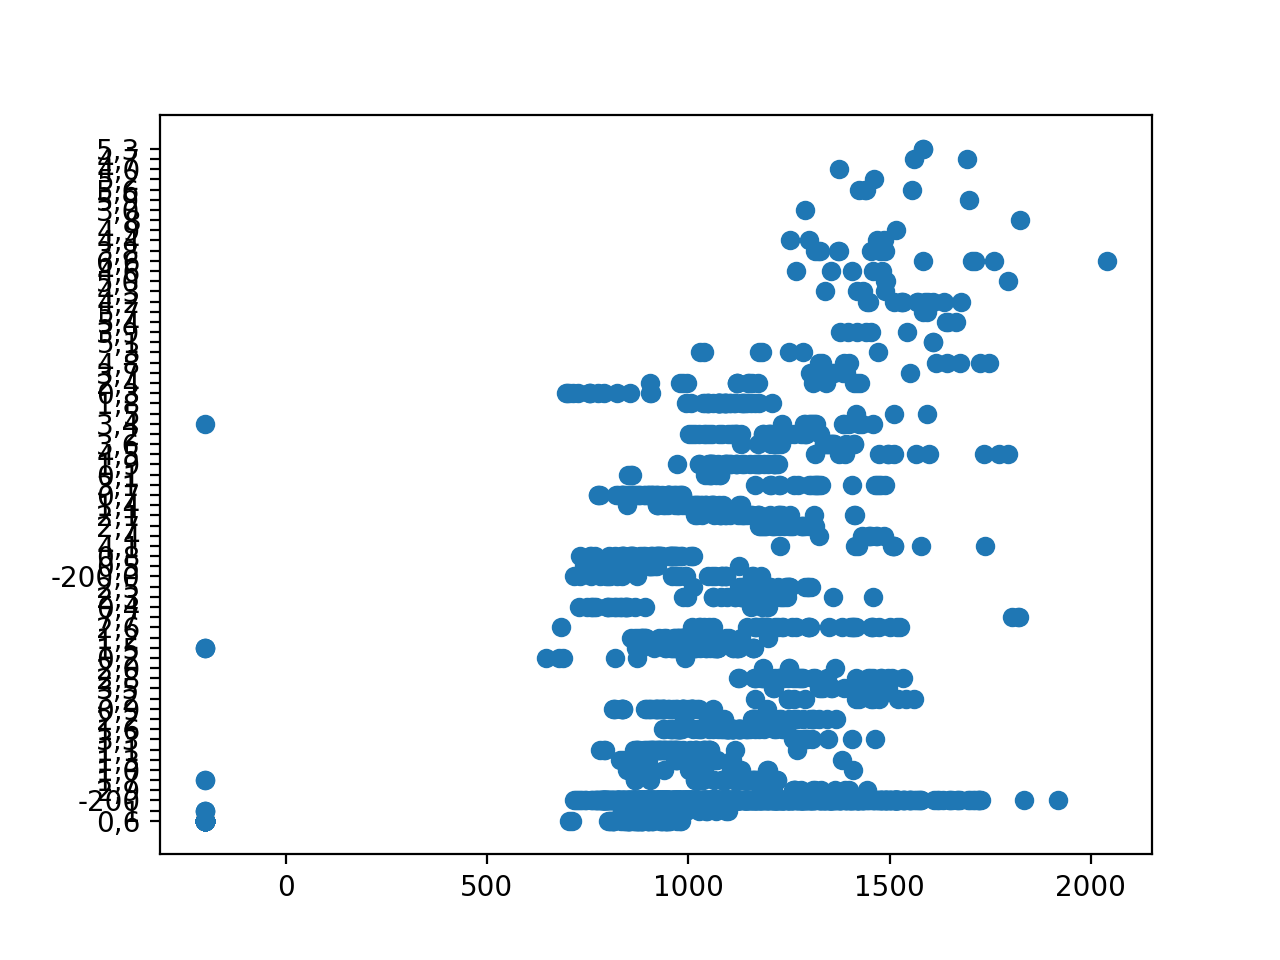

In [157]:
#plt.figure()
plt.scatter(X_test.CO, prediction)
plt.show()